In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

data = load_wine()
X = data.data  
y = data.target 

df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Jumlah fitur dalam dataset: 13


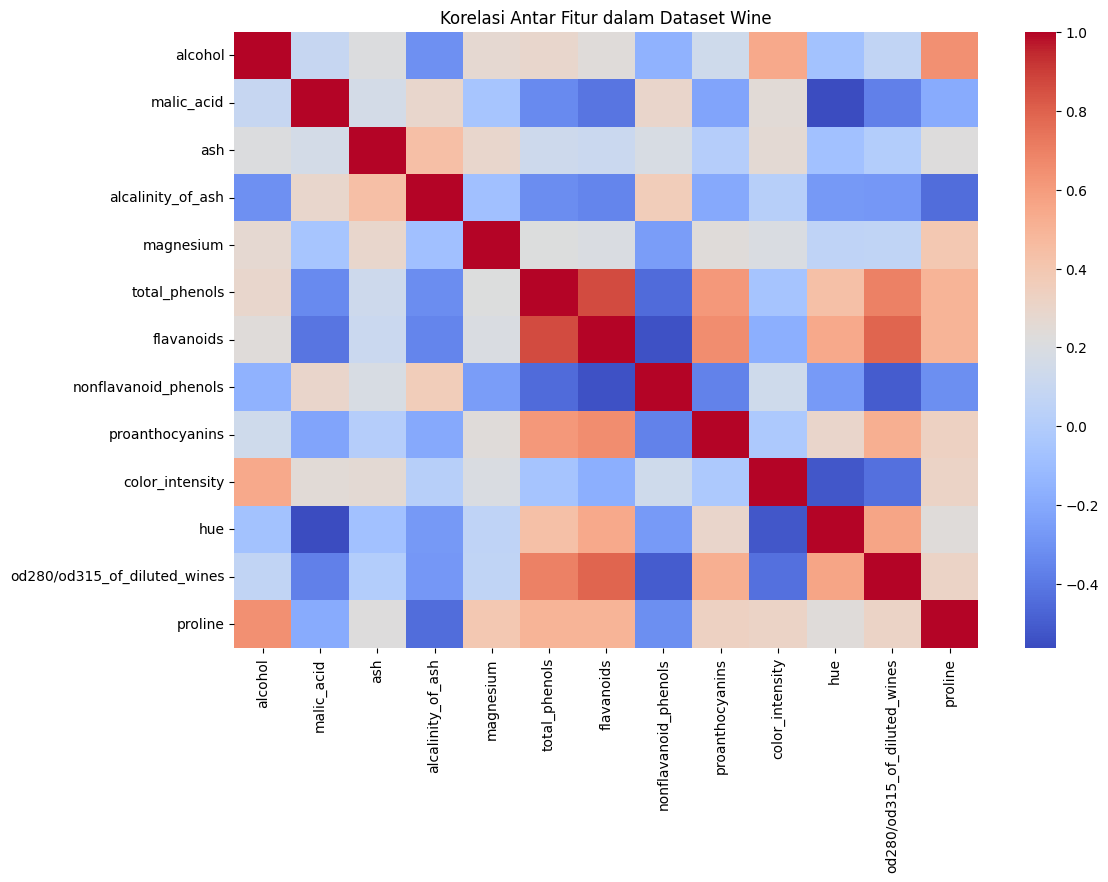

In [2]:
print(f"Jumlah fitur dalam dataset: {X.shape[1]}")

plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:, :-1].corr(), cmap="coolwarm", annot=False)
plt.title("Korelasi Antar Fitur dalam Dataset Wine")
plt.savefig('29_01.png', format='png', dpi=300)
plt.show()

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Variansi yang dijelaskan oleh 2 komponen utama: [0.36198848 0.1920749 ]


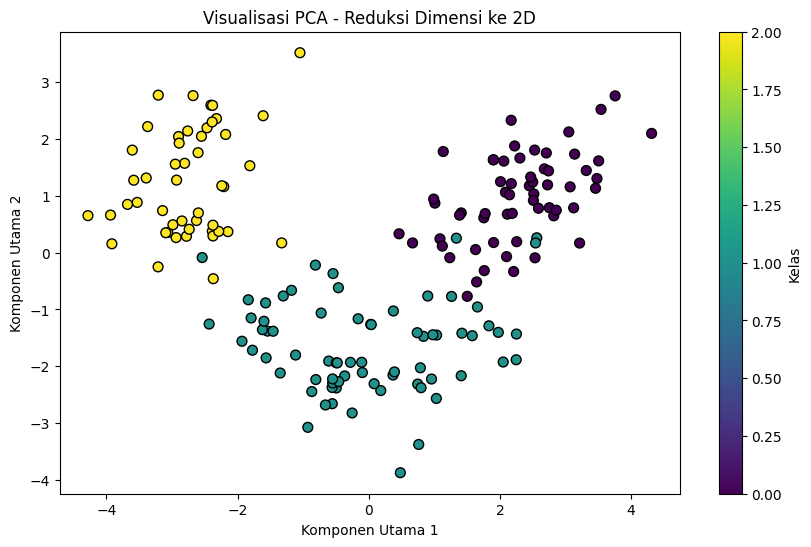

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Variansi yang dijelaskan oleh 2 komponen utama: {pca.explained_variance_ratio_}")

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", edgecolor="k", s=50)
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.title("Visualisasi PCA - Reduksi Dimensi ke 2D")
plt.colorbar(label="Kelas")
plt.savefig('29_02.png', format='png', dpi=300)
plt.show()